In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import to_categorical

In [6]:
data = pd.read_csv('Iris.csv')

In [9]:
X = data.drop(columns=['Id','Species'] , axis = 1)
y = data['Species']

In [12]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42 , stratify=y)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
perceptron = Perceptron(max_iter=1000, random_state=42)
perceptron.fit(X_train, y_train)
y_pred_perceptron = perceptron.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred_perceptron)

0.8666666666666667

In [17]:
y_train_cat = to_categorical(y_train , num_classes=3)
y_test_cat = to_categorical(y_test , num_classes=3)

In [18]:
model = Sequential(
    [
        Dense(16, activation='relu', input_shape=(4,)),
        Dense(8, activation='relu'),
        Dense(3, activation='softmax')
    ]
)

In [19]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train_cat, epochs=100, batch_size=8, validation_split=0.2,verbose=1)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.1354 - loss: 1.4639 - val_accuracy: 0.0000e+00 - val_loss: 1.3784
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1354 - loss: 1.3701 - val_accuracy: 0.0833 - val_loss: 1.3053
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1458 - loss: 1.3003 - val_accuracy: 0.0833 - val_loss: 1.2427
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1562 - loss: 1.2343 - val_accuracy: 0.1667 - val_loss: 1.1866
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3021 - loss: 1.1797 - val_accuracy: 0.1667 - val_loss: 1.1368
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3646 - loss: 1.1283 - val_accuracy: 0.2083 - val_loss: 1.0882
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4479 - loss: 1.0818 - val_accuracy: 0.4167 - val_loss: 1.0410
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5208 - loss: 1.0320 - val_accuracy: 0.458

In [21]:
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=1)
print(f'Test Accuracy: {accuracy*100:.2f}%')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.9667 - loss: 0.1156
Test Accuracy: 96.67%


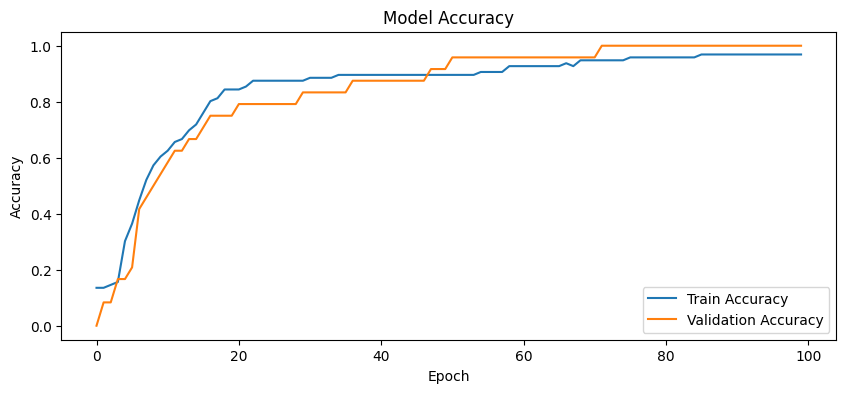

In [23]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
